In [187]:
import time
import csv
# from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas
import re
import sys
import urllib
import urllib.parse
from io import BytesIO
from PIL import Image
import statistics
import matplotlib.pyplot as plt
from ggplot import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import numpy as np


In [193]:
file = "shlj.csv"
data = pandas.read_csv(file)

In [218]:
data[0:10]
data[data.neighbourhood == "天平小区"]

,neighbourhood,layout,square,district,area,level,facing,built,metro,price,price_per_sqm,room,lv_room,type,floor,subline,subdist,square_10
17590,天平小区,2室2厅,111.44,徐汇,NaN,低区/20层,朝西南,1995.0,距离11号线交通大学站609米,1000,89734,2,2,NaN,20,11.0,609.0,110
25384,天平小区,2室1厅,72.54,徐汇,NaN,低区/20层,朝南,1995.0,距离11号线交通大学站609米,725,99944,2,1,NaN,20,11.0,609.0,70
31966,天平小区,2室2厅,111.44,徐汇,NaN,低区/20层,朝西南,1995.0,距离11号线交通大学站609米,1000,89734,2,2,NaN,20,11.0,609.0,110


In [195]:
# data['price_per_sqm'] = pandas.to_numeric(data['price_per_sqm'])

In [196]:
data = data[data['square'] <= 200]
data = data[data['price'] <= 2000]
data = data[data['price_per_sqm'] <= 100000]
data.describe()

C:\Users\Yuqin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,square,area,built,price,price_per_sqm,room,lv_room,type,floor,subline,subdist,square_10
count,39446.000000,0.0,33504.000000,39446.000000,39446.000000,39446.000000,39446.000000,0.0,39446.000000,25003.000000,25003.000000,39446.000000
mean,87.530144,NaN,1998.916040,506.684074,57938.140851,2.195381,1.462987,NaN,11.046393,6.885734,572.540575,87.538153
std,34.935510,NaN,9.457589,274.693060,16689.724798,0.798198,0.631522,NaN,7.674076,3.822875,226.882247,35.086562
min,20.620000,NaN,1912.000000,70.000000,11792.000000,1.000000,0.000000,NaN,1.000000,1.000000,24.000000,20.000000
25%,59.880000,NaN,NaN,315.000000,45804.000000,2.000000,1.000000,NaN,6.000000,NaN,NaN,60.000000
50%,83.550000,NaN,NaN,420.000000,56790.000000,2.000000,2.000000,NaN,6.000000,NaN,NaN,80.000000
75%,108.550000,NaN,NaN,630.000000,68965.000000,3.000000,2.000000,NaN,15.000000,NaN,NaN,110.000000
max,200.000000,NaN,2016.000000,1950.000000,100000.000000,9.000000,4.000000,NaN,90.000000,17.000000,1000.000000,200.000000


In [56]:
file_r = "shljrent.csv"
data_r = pandas.read_csv(file_r)
data_r['square'] = pandas.to_numeric(data_r['square'])
data_r['square_10'] = round(data_r['square'], -1)
data_r['rent_per_sq'] = data_r['price'] / data_r['square']
print(data_r[0:10])
data_r = data_r[data_r['price'] <= 20000]
data_r = data_r[data_r['square'] <= 200]
data_r.describe()

    neighbourhood layout  square district   area   level facing  \
0           保利西子湾   1室1厅      59       松江  松江大学城  中层/18层     朝南   
1           中远两湾城   1室2厅      59       普陀  中远两湾城  低层/30层     朝南   
2           兆丰帝景苑   2室2厅     113       徐汇    徐家汇  低层/28层     朝南   
3           慧芝湖花园   1室2厅      70       闸北     大宁  低层/36层     朝南   
4           老西门新苑   2室2厅     120       黄浦    老西门  低层/35层     朝南   
5   菊泉新城（陆翔路698弄）   2室2厅      85       宝山     顾村  中层/14层    朝南北   
6  古北菊翔苑（菊联路233弄）   2室1厅      73       宝山     顾村   中层/5层    朝南北   
7            乾溪新村   2室1厅      54       宝山    大场镇   高层/6层    NaN   
8           滨江名人苑   3室2厅     155       黄浦   黄浦滨江  中层/32层    朝南北   
9          卢湾都市花园   2室2厅      96       黄浦    五里桥  高层/25层    NaN   

             metro  price   timestamp  room  lv_room type  floor  subline  \
0  距离9号线松江大学城站700米   3400  2016.11.01     1        1    中     18      9.0   
1    距离4号线中潭路站425米   6000  2016.11.14     1        2    低     30      4.0   
2    距离1号线徐家汇站563米  16000  2016

C:\Users\Yuqin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,square,price,room,lv_room,floor,subline,subdist,square_10,rent_per_sq
count,22933.0000,22933.000000,22933.000000,22933.000000,22933.000000,15328.000000,15328.000000,22933.000000,22933.000000
mean,77.1282,6010.691057,1.950028,1.313260,11.993982,7.165971,551.747195,77.205773,83.857162
std,33.8171,3591.075481,0.779074,0.637152,8.520440,3.825036,227.547241,33.934240,84.337284
min,1.0000,1000.000000,1.000000,0.000000,1.000000,1.000000,23.000000,0.000000,5.555556
25%,51.0000,3600.000000,1.000000,1.000000,6.000000,NaN,NaN,50.000000,57.291667
50%,72.0000,4900.000000,2.000000,1.000000,7.000000,NaN,NaN,70.000000,77.777778
75%,96.0000,7000.000000,2.000000,2.000000,17.000000,NaN,NaN,100.000000,102.362205
max,200.0000,20000.000000,7.000000,4.000000,77.000000,17.000000,1000.000000,200.000000,8500.000000


In [205]:
# trying to match house and rent data
# first, try to strictly match on neighbourhood, room, floor, facing
# aggregate both datasets
house_aggr = data.groupby(['neighbourhood', 'district', 'room', 'floor', 'facing', 'square_10', 'built'])
print(len(data))
print(house_aggr.size().value_counts())
aggregation = {
    'price' : {
        'counts' : 'count',
        'mean' : 'mean',
        'min' : 'min',
        'max' : 'max'}}
house_aggr = house_aggr.agg(aggregation).reset_index()

39446
1     20402
2      3024
3       855
4       298
5       129
6        46
7        30
9        13
8        12
10        5
14        2
15        1
21        1
11        1
12        1
13        1
16        1
dtype: int64


In [206]:
rent_aggr = data_r.groupby(['neighbourhood', 'district', 'room', 'floor', 'facing', 'square_10'])
print(len(data_r))
print(rent_aggr.size().value_counts())
rent_aggr = rent_aggr.agg(aggregation).reset_index()

22933
1     13647
2      1514
3       367
4       115
5        52
6        18
7         8
8         6
15        2
9         2
13        1
28        1
12        1
10        1
dtype: int64


In [213]:
match_pairs = pandas.merge(house_aggr, rent_aggr, on=['neighbourhood', 'district', 'room', 'floor', 'facing', 'square_10'])
match_pairs['ratio'] = match_pairs['price_y']['mean'] / match_pairs['price_x']['mean']
plot_data = match_pairs[(match_pairs.price_x['mean'] < 800) & (match_pairs.price_x['mean'] > 300) & (match_pairs.district == "徐汇")].sort_values('ratio', ascending = False)
def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
print_full(plot_data)

     neighbourhood district room floor facing square_10   built price_x  \
                                                                    max   
686         光大会展中心       徐汇    3    30     朝南       160  2001.0     830   
1502          宛南六村       徐汇    2     5     朝南        40  1980.0     325   
3819      襄阳南路277弄       徐汇    1     6     朝南        40  1990.0     395   
3873          谨斜小区       徐汇    2     5     朝南        50  1981.0     330   
3838          西木小区       徐汇    1     6     朝南        40  1983.0     305   
515           乐山一村       徐汇    1     6    朝南北        40  1992.0     340   
4629        龙吴路13弄       徐汇    2     6    朝南北        60  1989.0     450   
766           冶金小区       徐汇    2     5     朝南        50  1990.0     325   
765           冶金小区       徐汇    2     5     朝南        50  1981.0     330   
4240          钦州公寓       徐汇    2    18     朝南        70  1995.0     440   
3871          谨斜小区       徐汇    2     5     朝南        50  1974.0     350   
1505      宛平南路170弄       

C:\Users\Yuqin\Anaconda3\lib\site-packages\pandas\tools\merge.py:478: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  self.right = self.right.drop(right_drop, axis=1)


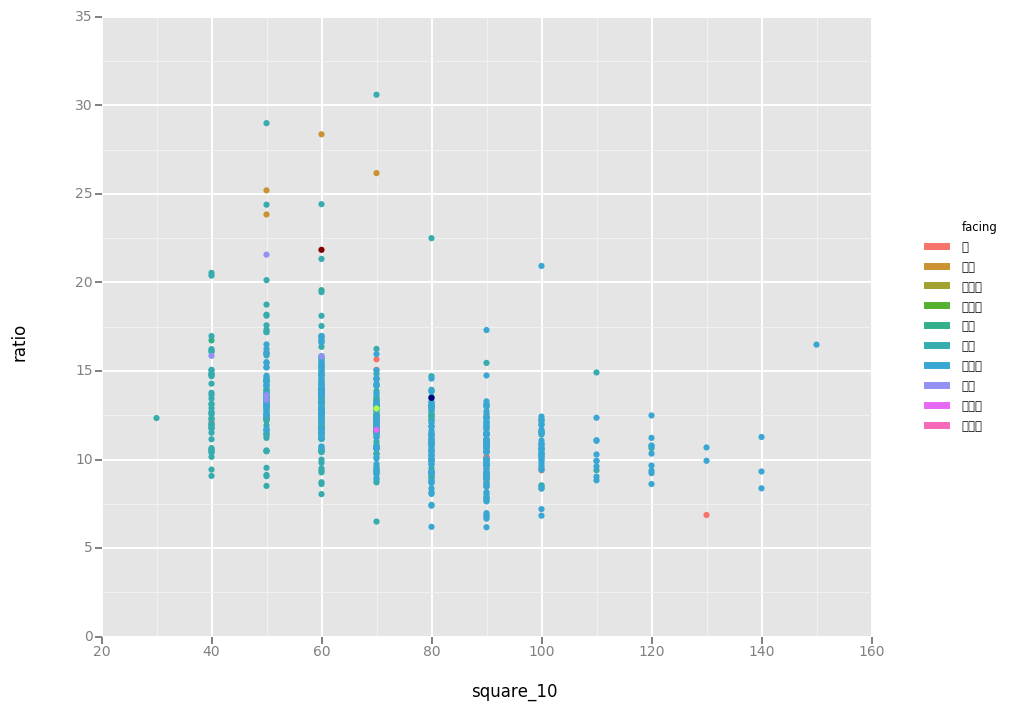

<ggplot: (-9223371904212013582)>

In [122]:
ggplot(plot_data, aes("square_10", "ratio", color = 'facing')) + geom_point()

In [124]:
len(plot_data['neighbourhood'].unique())

487

In [77]:

match_pairs.sort_values('ratio', ascending = False)

neighbourhood room floor facing square_10 square_x                      \
                                                  sqmin   sqmax      sqmean   
3114          爱久家园    1    18     朝北      30.0    32.00   32.00   32.000000   
3115          爱久家园    1    18     朝南      30.0    32.00   32.00   32.000000   
1741          富林公寓    1    18     朝东      40.0    39.00   39.00   39.000000   
3028          湖畔尚品    1    12     朝南      40.0    38.00   38.00   38.000000   
3690        美豪瑞登酒店    1    22     朝北      40.0    42.26   42.26   42.260000   
1434   大上海国际花园酒店公寓    1    11     朝东      40.0    37.20   42.49   39.845000   
1435   大上海国际花园酒店公寓    1    11     朝南      60.0    63.11   63.11   63.110000   
3691        美豪瑞登酒店    1    22     朝南      40.0    41.05   41.05   41.050000   
1035          协泰中心    2    29     朝北     120.0   119.24  119.24  119.240000   
1879       底特律财富天地    2    24     朝西      50.0    49.51   49.51   49.510000   
103       万达广场（嘉定）    1    12     朝北      50.0    46.57   46.57   46.570000   
3519    绿地公园广场（商住）    1    17     朝北      40.0    36.49   39.33   37.910000   
3026          湖畔尚品    1    12     朝北      40.0    41.30   43.00   41.596667   
1179          合景峰汇    1    19     朝南      40.0    42.57   42.86   42.763333   
4209         金巢铂瑞阁    1    14     朝东      60.0    60.74   60.74   60.740000   
3027          湖畔尚品    1    12     朝北      50.0    48.26   48.26   48.260000   
4199          金城大厦    1    28     朝北      40.0    37.21   37.21   37.210000   
102       万达广场（嘉定）    1    12     朝北      40.0    43.76   43.76   43.760000   
1613          安天大厦    1    15     朝东      40.0    42.43   42.43   42.430000   
101       万达广场（嘉定）    1    10     朝东      40.0    41.61   41.61   41.610000   
2318         旭辉U天地    2    12     朝西      50.0    48.51   48.51   48.510000   
1771          展想悦廷    1    16     朝西      50.0    53.09   54.12   53.605000   
4156          金南新苑    3    32    朝东南     140.0   140.38  140.38  140.380000   
3035          源达大厦    1    37     朝南      50.0    50.59   50.59   50.590000   
105       万达广场（松江）    1    19     朝北      40.0    41.89   44.51   42.115833   
4103          通用国际    1     7     朝北      50.0    47.61   47.70   47.670000   
2634      森晟世洋国际广场    1     9     朝西      20.0    24.34   24.34   24.340000   
428         中信虹港名庭    1    13     朝南      50.0    45.75   45.75   45.750000   
3592      绿地领海（商住）    3    28     朝南     170.0   169.35  171.02  170.185000   
1770          展想悦廷    1    16     朝东      50.0    52.95   53.11   52.995000   
...            ...  ...   ...    ...       ...      ...     ...         ...   
4807          龙州小区    2     6     朝南      60.0    61.36   64.96   63.160000   
3448           紫翠苑    2     6    朝南北      80.0    80.98   80.98   80.980000   
1624           安阁苑    2    11     朝南      80.0    75.13   76.70   75.653333   
2728          永和一村    3     6    朝南北     100.0   102.47  102.47  102.470000   
2046          惠南小城    2    11    朝南北      90.0    91.16   91.16   91.160000   
1569         好世凤凰城    2     4    朝南北      90.0    88.91   88.91   88.910000   
2195          新城金郡    2    18     朝南      80.0    81.18   83.45   82.272000   
373           东方龙苑    3    11    朝南北     100.0   101.81  101.81  101.810000   
1705          宝虹公寓    3     8     朝南     140.0   135.24  135.24  135.240000   
4001      证大家园（公寓）    2     6    朝南北      90.0    88.18   94.20   92.096667   
691           亭汇花苑    3     6    朝南北     130.0   129.07  129.07  129.070000   
4299       金汇花园四街坊    3     7    朝南北     120.0   117.55  117.55  117.550000   
4577         阳光西班牙    3    18    朝南北     130.0   129.68  129.68  129.680000   
3775           花木苑    3     6    朝南北      90.0    92.63   94.99   93.890000   
285           世华锦城    2     6     朝南      80.0    79.95   79.95   79.950000   
3730          聚缘南庭    2     9     朝南      70.0    74.35   74.35   74.350000   
1346          四季绿城    2     6      朝      90.0    92.31   92.31   92.310000   
1731      富丽公寓（东区）    3     6     朝南     110.0   111.39

In [8]:
### clean up date to get unique list of neighbourhood
print(len(data['neighbourhood'].unique()))
print(len(data_r['neighbourhood'].unique()))
print(len(data['neighbourhood'].append(data_r['neighbourhood']).unique()))
print(data['neighbourhood'].unique()[1:10])
print(data_r['neighbourhood'].unique()[1:10])
unique_nbh = data['neighbourhood'].append(data_r['neighbourhood']).unique()

9032
6895
10338
['文化花园香榭丽苑' '番禺大厦' '上海壹街区' '殷行路305弄' '泰祥楼' '梅园六街坊' '大唐盛世花园' '恒昌花园' '涵乐园']
['中远两湾城' '兆丰帝景苑' '慧芝湖花园' '老西门新苑' '菊泉新城（陆翔路698弄）' '古北菊翔苑（菊联路233弄）' '乾溪新村'
 '滨江名人苑' '卢湾都市花园']


In [125]:
### get geocoding for each neighbourhood
ak = "pD5K0Qt5gDDsFG4XqTQusUz7blSogbNK"
api_path = "http://api.map.baidu.com/geocoder/v2/?"
output = "xml"
city = "上海市"
address = "泰祥楼"
def gbk_encoding(text):
    return(urllib.parse.quote(text.encode('gbk')))

def get_geocoding(address):
    print(address)
    gbk_url = api_path + "output=" + output + "&address=" + gbk_encoding(address) + "&city=" + gbk_encoding(city) + "&ak=" + ak
    html = urllib.request.urlopen(gbk_url).read()
    bsObj = BeautifulSoup(html.decode('utf-8'))
    status = bsObj.find("status").string
    if status == "0":
        lng = bsObj.find("lng").string
        lat = bsObj.find("lat").string
    elif status == "1":
        lng = ""
        lat = ""
        print("Cannot find", address)
    coord = [lng, lat]
    return(coord)

print(get_geocoding(address))

泰祥楼
Cannot find 泰祥楼
['', '']


C:\Users\Yuqin\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\Yuqin\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [126]:
# unique_nbh_top100 = unique_nbh[1:100]
# coordinates_top100 = [get_geocoding(nbg) for nbg in unique_nbh_top100]
coordinates = [get_geocoding(nbg) for nbg in plot_data['neighbourhood'].unique()]


静安艺庭


C:\Users\Yuqin\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\Yuqin\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


万业新阶
Cannot find 万业新阶
中福世福汇
海上国际
金巢铂瑞阁
君誉江畔
东方蓝海国际广场
宝石公寓
南园小区
竹园新村（浦东）
爱俪轩
三湘未来海岸
巴黎时韵
虹仙小区
天钥新村
古美小区
张泾小区
东欣小区
化工小区（长宁）
金地湾流域（公寓）
Cannot find 金地湾流域（公寓）
南泉小区
龙柏四村
香楠小区
东昌新村
金杨新村九街坊
新领地
高荣小区
中福花苑
新长征花苑
昌五小区
新泾六村
宛平南路170弄
阳光翠庭
佳宝一村
德州大楼
国和一村
泰东新村（徐汇）
西木小区
寿昌坊
古北嘉年华庭
圣天地酒店式公寓
芝巷小区
南方新村
九歌上郡
平吉二村
番禺路385弄
新泾七村
绿洲香岛花园
双东小区
古美八村
罗山四村
莲溪六村
龙柏七村
龙柏二村
东体小区
昌七小区
平阳新村四街坊
南茶园
南长小区
香山新村西南街坊
臻果国际
八方大厦
王家堂小区
东泉苑小区
平吉一村
金杨新村五街坊
西凌新邨
齐二小区
通河四村
番禺大厦
丁香园
春港丽园（公寓）
白玉新村
金杨新村十街坊
上虹新村
句容小区
金恒小区
凌兆新村（上浦路36弄）
寿祥坊
新世纪花苑（浦东）
平阳一村
培花久远公寓
乐山二村
平阳三村
万邦都市花园
丰三小区
长兴坊
潍坊三村
章家巷小区
汇成一村
大木小区
东湖小区
金杨七街坊
万里晶品苑
龙柏三村
建德花园紫荆苑
吴东小区
龙柏四村三小区
平南三四村
金杨二街坊
凌兆新村（上浦路201弄）
新梅花苑
新泾四村
巨西小区
金杨新村三街坊
好世鹿鸣苑
申良花园
嘉善坊
文化名园
民春苑
古美一村
广中路470号
漕溪大楼
市光四村
漕溪四村
澜茵华庭
福泉路385弄
潍坊二村
鹏海小区
Cannot find 鹏海小区
金桥新村四街坊（长岛路1201弄）
花苑茶花园
控江四村
瑞福北大楼
Cannot find 瑞福北大楼
吉浦路615弄
大华二村
淞南八村
和平小区（浦东）
开发浦东
寺前浜
Cannot find 寺前浜
田林十一村
新城悠活城
梅陇四村
华山花苑
虹莘新村
丰庄十四街坊
陆家浜路1382弄
政通路100弄
梅园五街坊
乐山四五村
绿川小区
潍坊四村
三林苑
逸仙一村
博三小区
东苑怡景园
中远两湾城
绿地新江桥城
吉云公寓
翔殷路491弄
好旺花苑
御桥花园
红明二村
九城湖滨国际
浦发绿城
潍

In [141]:
house_coords = pandas.concat(
    [pandas.DataFrame(plot_data['neighbourhood'].unique()), 
    pandas.DataFrame(coordinates)], 
    axis=1, ignore_index=True)
house_coords.columns=['neighbourhood', 'lng', 'lat']
house_coords = house_coords[house_coords['lng'] != ""]
print(house_coords)
max_lat = max(house_coords['lat'].convert_objects(convert_numeric=True))
min_lat = min(house_coords['lat'].convert_objects(convert_numeric=True))
max_lng = max(house_coords['lng'].convert_objects(convert_numeric=True))
min_lng = min(house_coords['lng'].convert_objects(convert_numeric=True))
h = max_lat - min_lat
w = max_lng - min_lng
min_x = min_lng - 0.01 * w
max_x = max_lng + 0.01 * w
min_y = min_lat - 0.01 * h
max_y = max_lat + 0.01 * h
bbox_str = str(min_x) + "," + str(min_y) + ";" + str(max_x) + "," + str(max_y)
print(bbox_str)
avg_x = statistics.median(house_coords['lng'].convert_objects(convert_numeric=True))
avg_y = statistics.median(house_coords['lat'].convert_objects(convert_numeric=True))
center_str = str(avg_x) + "," + str(avg_y)
print(center_str)
house_coords_plot = house_coords
house_coords_plot['lat'] = pandas.to_numeric(house_coords_plot['lat'])
house_coords_plot['lng'] = pandas.to_numeric(house_coords_plot['lng'])
house_coords_plot

    neighbourhood            lng            lat
0            静安艺庭  121.451601565  31.2440394921
2           中福世福汇  121.491452014  31.2379559102
3            海上国际  121.516728017   31.279522414
4           金巢铂瑞阁  121.471164868  31.2066500193
5            君誉江畔  121.524855003  31.2174729442
6        东方蓝海国际广场  121.527582995  31.2964104039
7            宝石公寓  121.399129892  31.2015605658
8            南园小区    121.4814881  31.2049479614
9        竹园新村（浦东）  121.538191121  31.2351968698
10            爱俪轩  121.445021258  31.2227569703
11         三湘未来海岸  121.511957654  31.3230690057
12           巴黎时韵  121.464179768  31.2120896888
13           虹仙小区  121.392064618  31.2104517796
14           天钥新村  121.452718943  31.1928512049
15           古美小区  121.405128552  31.1612513928
16           张泾小区  121.377698381  31.2004130491
17           东欣小区  121.529622094  31.2314153072
18       化工小区（长宁）  121.387616109  31.2133014968
20           南泉小区  121.528768979  31.2184684799
21           龙柏四村  121.370435159  31.185

C:\Users\Yuqin\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Yuqin\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Yuqin\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Yuqin\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Yuqin\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timede

,neighbourhood,lng,lat
0,静安艺庭,121.451602,31.244039
2,中福世福汇,121.491452,31.237956
3,海上国际,121.516728,31.279522
4,金巢铂瑞阁,121.471165,31.206650
5,君誉江畔,121.524855,31.217473
6,东方蓝海国际广场,121.527583,31.296410
7,宝石公寓,121.399130,31.201561
8,南园小区,121.481488,31.204948
9,竹园新村（浦东）,121.538191,31.235197
10,爱俪轩,121.445021,31.222757


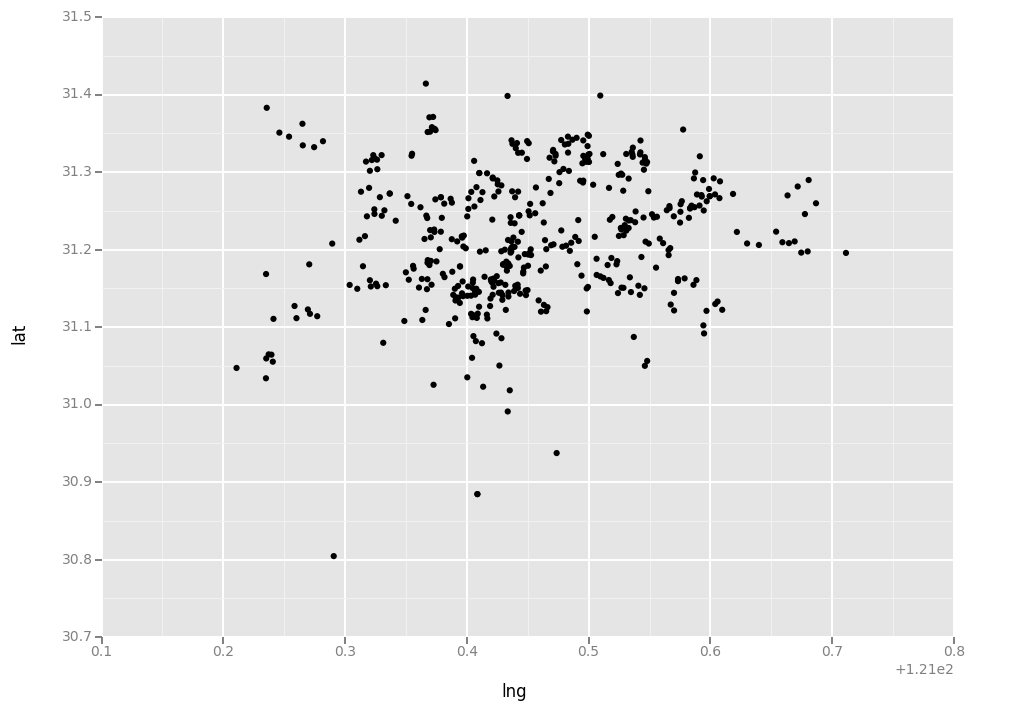

<ggplot: (132646078030)>

In [147]:
house_coords_plot = house_coords_plot[(house_coords_plot["lng"] >121.2) & (house_coords_plot["lng"] <121.8)]
ggplot(house_coords_plot, aes("lng", "lat")) + geom_point()

In [173]:
density_plot_data = pandas.merge(house_coords_plot.reset_index(), plot_data.reset_index(), left_on = "neighbourhood", right_on = "neighbourhood")
x = density_plot_data['lng']
y = density_plot_data['lat']
z = density_plot_data[('ratio', '')]
N = int(len(z)**.5)
# z = z.reshape(N, N)

# plt.imshow(z, extent=(np.amin(x), np.amax(x), np.amin(y), np.amax(y)), cmap=cm.hot)
z



C:\Users\Yuqin\Anaconda3\lib\site-packages\pandas\tools\merge.py:205: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\Yuqin\Anaconda3\lib\site-packages\pandas\tools\merge.py:478: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  self.right = self.right.drop(right_drop, axis=1)


0      30.597015
1      28.363636
2      25.200000
3      26.172840
4      22.500000
5      24.418605
6      15.833333
7      23.838384
8      21.842105
9      21.568627
10     21.328671
11     19.565217
12     20.930233
13     20.540541
14     20.386100
15     16.235632
16     16.071429
17     15.995175
18     20.129870
19     19.453552
20     18.750000
21     18.181818
22     14.024390
23     14.000000
24     18.125000
25     18.115942
26     17.580645
27     17.542017
28     15.660377
29     14.200000
         ...    
579     9.038031
580     9.025271
581     8.992806
582     8.977273
583     7.444444
584     8.888889
585     8.750000
586     8.745247
587     8.720930
588     8.714175
589     8.690564
590     8.670520
591     8.629032
592     8.618750
593     8.474576
594     8.383838
595     8.369565
596     8.362069
597     8.163265
598     8.061420
599     8.055556
600     8.051948
601     7.906977
602     7.641615
603     7.205240
604     6.870968
605     6.832797
606     6.5010

http://api.map.baidu.com/staticimage/v2?ak=pD5K0Qt5gDDsFG4XqTQusUz7blSogbNK&width=1024&height=1024&zoom=13&scale=1&center=121.483932674,31.2135862833&markers=121.500189383,31.3082126044|121.433802083,31.2122688856|121.487899486,31.24916171|121.546454,31.3332738815|121.534080833,31.2414767728|121.563608674,31.2137144468|121.455536533,31.1955106966|121.539235774,31.2391167211|121.398501185,31.2109156869|121.659090656,31.2093802561|121.432275933,31.2493122659|121.48541096,31.2048863792|121.602683931,31.2841999852|121.367895926,31.1863416099|121.532732074,31.2723265459|121.242597763,31.0292743531|121.519453902,31.2963203937|121.633338894,31.2926527588|121.562460778,31.2529499425|121.417674234,31.1957299887|121.446235005,31.1691520896|121.526415152,31.2277896557|121.667934232,31.2134581199|121.476576444,31.2471728776|121.505594015,31.1758008725|121.424545073,31.1655355305|121.501506748,31.2879505507|121.583583922,31.2880724881|121.44103336,31.1912793448|121.491972587,31.3084026317|121.40343

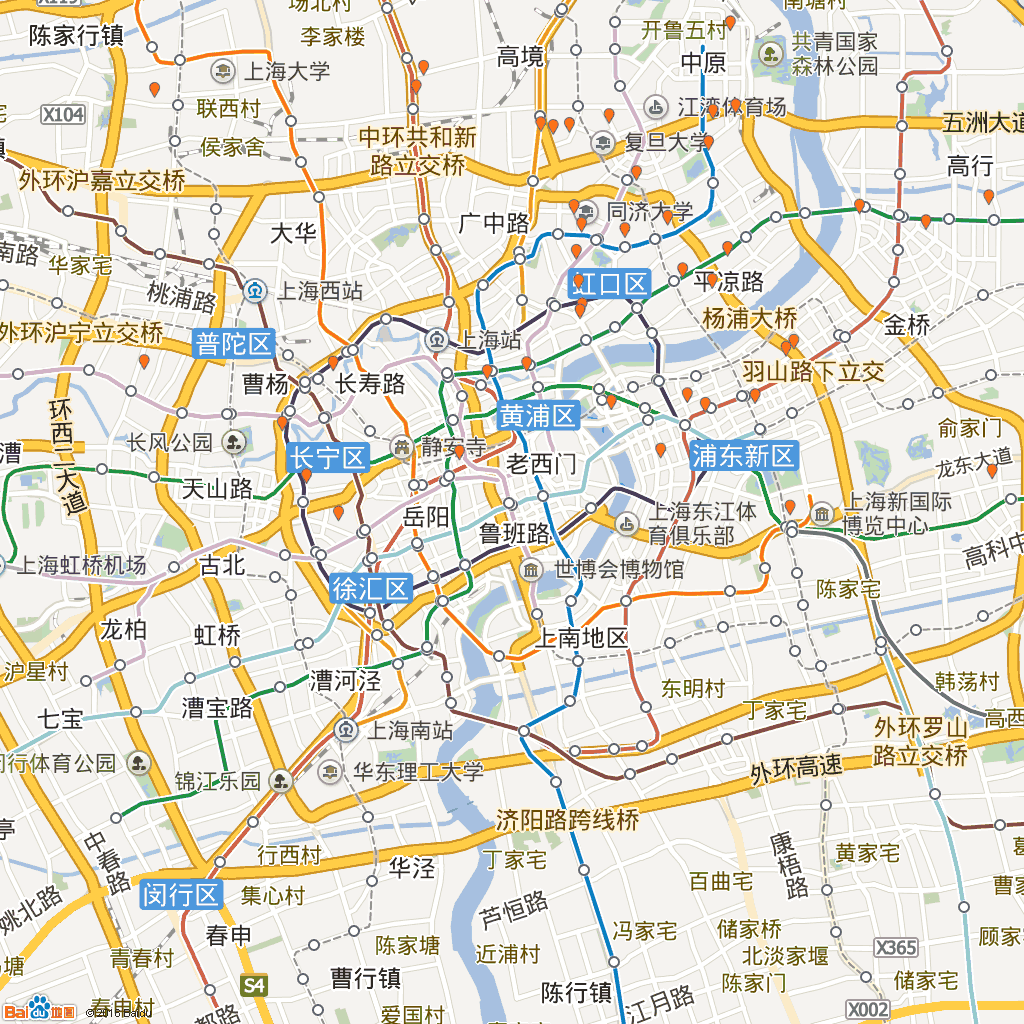

In [209]:
### get geocoding for each neighbourhood
ak = "pD5K0Qt5gDDsFG4XqTQusUz7blSogbNK"
map_api_path = "http://api.map.baidu.com/staticimage/v2?"
fix_opt = ""
fix_opt = "&width=1024&height=1024&zoom=13&scale=1"
# "&bbox=" + bbox_str + 
# &zoom=15&scale=1
marker_str = '|'.join(house_coords['lng'] + "," + house_coords['lat'])
markerStyle_str = '|'.join(["s"] * len(house_coords))
image_url = map_api_path + "ak=" + ak + fix_opt + "&center=" + center_str + "&markers=" + marker_str + "&markerStyles=" + markerStyle_str
#image_url = map_api_path + "ak=" + ak + fix_opt + "&center=" + center_str + "&markers=" + center_str + "&markerStyles=" + "l"
#image_url = "http://api.map.baidu.com/staticimage/v2?ak=pD5K0Qt5gDDsFG4XqTQusUz7blSogbNK&bbox=121.420821424,31.1817343781;121.576589333,31.3470502"
print(image_url)
imgfile = BytesIO(urllib.request.urlopen(image_url).read())
output = open("test.jpg", "wb")
output.write(imgfile.read())
output.close()

from IPython.display import Image
Image(filename='test.jpg') 

In [169]:
'|'.join(house_coords['lng'] + "," + house_coords['lat'])

0     True
1     True
2     True
3     True
4    False
5     True
6     True
7     True
8     True
Name: lng, dtype: bool


'121.500189383,31.3082126044|121.433802083,31.2122688856|121.487899486,31.24916171|121.546454,31.3332738815|,|121.534080833,31.2414767728|121.563608674,31.2137144468|121.455536533,31.1955106966|121.539235774,31.2391167211'

In [120]:
gdata['price'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
上海周边,4.0,137.500000,37.527767,90.0,116.25,145.0,166.25,170.0
嘉定,2745.0,395.433880,238.388084,48.0,263.00,350.0,470.00,2800.0
奉贤,1193.0,306.690696,170.212808,65.0,200.00,280.0,370.00,2500.0
宝山,4434.0,439.920162,233.897728,58.0,285.00,400.0,550.00,4500.0
崇明,8.0,208.875000,57.806172,150.0,180.00,195.0,216.25,336.0
徐汇,3211.0,713.507007,804.249130,182.0,365.00,508.0,830.00,23000.0
普陀,2968.0,566.443733,349.427202,110.0,300.00,476.5,750.00,4300.0
杨浦,2831.0,554.281526,376.918117,42.0,293.00,426.0,730.00,3200.0
松江,3170.0,575.887066,720.079157,50.0,320.00,415.0,560.00,19500.0


In [121]:
gdata['price_per_sqm'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
上海周边,4.0,18719.250000,6861.665317,10405.0,16351.00,18636.0,21004.25,27200.0
嘉定,2745.0,40772.717668,10664.583230,8163.0,33039.00,42029.0,48152.00,80256.0
奉贤,1193.0,30515.379715,7996.338089,12500.0,25000.00,29457.0,34547.00,86206.0
宝山,4434.0,48547.763194,10539.291808,10191.0,42625.00,48093.5,54703.25,112858.0
崇明,8.0,25183.000000,5744.815824,18001.0,20920.00,24173.5,29165.25,34883.0
徐汇,3211.0,79425.742136,22708.798313,33368.0,64319.50,74444.0,88681.00,255000.0
普陀,2968.0,63256.160377,14248.918769,14948.0,54246.50,61343.5,70462.25,173990.0
杨浦,2831.0,65858.440127,12787.048095,10565.0,57512.00,64068.0,72657.50,132397.0
松江,3170.0,42041.242902,12006.501360,10869.0,36233.50,40697.0,46413.75,280200.0


In [110]:
data[data['price'] > 10000]

,neighbourhood,layout,square,district,area,level,facing,built,metro,price,price_per_sqm,room,lv_room,type,floor,subline,subdist
17945,华山路480号,6室3厅,684.68,静安,静安寺,低层/5层,朝南,1937,距离7号线静安寺站718米,18000,262896,6,3,低,5,7,718
20904,西郊明苑别墅,6室3厅,542.63,长宁,西郊,地上2层,朝南北,2013,距离10号线龙溪路站426米,12500,230359,6,3,,2,10,426
22635,檀宫,7室3厅,1619.03,长宁,西郊,地上3层,朝北,,NaN,39500,243973,7,3,,3,,
24913,卫乐园,9室3厅,508.0,长宁,镇宁路,低层/3层,朝南北,1936,距离11号线交通大学站431米,18000,354330,9,3,低,3,11,431
29844,凤阳路338号,9室9厅,1338.64,黄浦,人民广场,低层/4层,朝南北,1918,距离2号线人民广场站542米,31800,237554,9,9,低,4,2,542
29870,西郊明苑别墅,6室3厅,489.4,长宁,西郊,地上2层,朝南北,2013,距离10号线龙溪路站426米,12200,249284,6,3,,2,10,426
32356,御翠园,5室5厅,993.88,浦东,花木,地上3层,朝南,,距离7号线花木路站786米,18000,181108,5,5,,3,7,786
32713,武夷路153弄,8室3厅,422.4,长宁,中山公园,高层/1层,朝南北,,距离2号线江苏路站724米,15000,355113,8,3,高,1,2,724
33737,九间堂,5室3厅,551.03,浦东,花木,地上3层,朝南,,NaN,11000,199626,5,3,,3,,
34136,东郊花园,9室8厅,725.67,浦东,张江,地上2层,朝南北,2005,NaN,12000,165364,9,8,,2,,


In [175]:
data[data['neighbourhood'] == "君莲新城广润苑"]

,neighbourhood,layout,square,district,area,level,facing,built,metro,price,price_per_sqm,room,lv_room,type,floor,subline,subdist,square_10
18549,君莲新城广润苑,1室1厅,59.55,闵行,春申,高层/17层,朝南,2011.0,NaN,310,52057,1,1,高,17,,NaN,60.0
22267,君莲新城广润苑,2室2厅,84.93,闵行,春申,高层/11层,朝南北,2010.0,NaN,400,47097,2,2,高,11,,NaN,80.0
30399,君莲新城广润苑,2室2厅,84.81,闵行,春申,高层/11层,朝南,2010.0,NaN,380,44806,2,2,高,11,,NaN,80.0
32905,君莲新城广润苑,2室2厅,84.80,闵行,春申,高层/11层,朝南北,2011.0,NaN,400,47169,2,2,高,11,,NaN,80.0
34905,君莲新城广润苑,1室0厅,59.70,闵行,春申,中层/11层,朝,2011.0,NaN,310,51926,1,0,中,11,,NaN,60.0
34983,君莲新城广润苑,2室2厅,84.69,闵行,春申,中层/11层,朝南,2011.0,NaN,400,47231,2,2,中,11,,NaN,80.0
35363,君莲新城广润苑,2室2厅,84.69,闵行,春申,低层/11层,朝南,2011.0,NaN,370,43688,2,2,低,11,,NaN,80.0
35371,君莲新城广润苑,3室2厅,102.89,闵行,春申,中层/11层,朝南北,2011.0,NaN,520,50539,3,2,中,11,,NaN,100.0
38471,君莲新城广润苑,2室2厅,84.69,闵行,春申,中层/11层,朝南,2011.0,NaN,400,47231,2,2,中,11,,NaN,80.0
38730,君莲新城广润苑,2室2厅,85.49,闵行,春申,低层/11层,朝南北,2010.0,NaN,375,43864,2,2,低,11,,NaN,90.0
